In [14]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

In [15]:
datadir = Path("../data/")
etccdi_presentf = datadir / "Climate"/ "ISEA3H09_CCSM4_Y1950_Y2000_ETCCDI_IDW1N10.txt"

# Exploring the ETCCDI climate variables

These variables weere derived by aggregating ETCCDI variables of the CCSM4 grid cells into ISEA3H09. The interpolation method was  IDW that maps the 10 nearest CCSM4 grid cells to one ISEA3H09 hexagon centroid.

## I. Exploring the 1950-2000 data

In [16]:
# dowmloading the data
present = pd.read_csv(etccdi_presentf, sep="\t")
present.sample(5)

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
66403,66404,79.083466,9.661011,4.080588,10.226827,70.273284,275.742009,15.352474,121.911901,1.137581,42.116897,0.076023,23.020451,7.515396,12.200136,19.746132,2.873655,152.457202,9.483072,11.367425,-14.308606,30.091765,96.622948,9.433147,11.078321,-7.269897,45.035835,5.430126
115835,115836,9.017688,1.730872,15.206933,2.261937,21.955592,183.046777,2.200869,973.126060,16.442620,224.810991,2.146509,191.059685,58.314896,27.968938,49.958459,4.331703,0.000000,10.012404,10.642754,-3.313275,10.232367,0.000000,10.482043,10.472001,-0.760292,12.208420,1.042262
131964,131965,12.835912,3.853695,9.988487,6.628358,360.687095,0.000000,331.250443,595.614995,4.705949,179.550886,0.109478,101.882198,28.763258,15.763671,30.937109,3.311303,0.000000,10.353086,11.492879,-35.180089,0.091907,0.000000,10.368647,10.871190,-31.631638,1.767536,6.701509
122684,122685,14.781324,4.499289,10.917725,0.981719,0.000000,365.000000,0.000000,1410.303452,44.651484,152.525917,19.267055,352.326713,104.735402,70.112437,134.483900,9.235028,23.994364,9.692305,12.138385,14.457565,25.508063,193.480678,9.589819,11.734669,15.401360,26.060434,7.205601
158322,158323,13.653778,8.278995,45.648932,1.724957,0.000000,365.000000,0.000000,2725.593042,88.639102,271.607621,31.551802,662.224115,238.256240,101.336017,255.405240,10.008590,352.389869,10.045609,11.951791,22.829152,27.376468,364.109442,10.043328,11.016951,24.494084,29.694648,6.072808


In [74]:
# basic statistics, something weird about CDD's max value
present.describe(include="all")

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
count,196832.00000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000,196832.000000
mean,98416.50000,53.461916,5.921488,19.448150,3.913968,66.152896,283.407494,49.761787,1027.460573,28.711493,154.435523,8.879405,236.388862,75.945661,43.664978,92.993421,5.987150,134.004543,10.170603,11.166394,1.226858,20.310472,159.527339,10.198060,11.146702,4.758275,24.631820,8.267821
std,56820.64843,120.135759,3.414841,16.634862,3.965489,119.556650,136.089634,105.124877,740.698730,26.403323,74.932983,10.030891,174.392344,57.529881,24.547932,59.347809,2.390525,145.094095,0.658983,0.724655,23.936553,10.356050,156.289682,0.653036,0.753927,22.663115,11.696714,5.638105
min,1.00000,4.009007,0.067093,0.042284,0.407698,0.000000,0.000000,0.000000,0.055981,0.000000,0.042284,0.000000,0.000000,0.000000,0.669288,1.662915,0.053741,0.000000,7.797225,8.633949,-74.617955,-30.565328,0.000000,8.091539,8.599853,-72.497892,-25.841064,0.022317
25%,49208.75000,13.973389,3.384982,8.654831,0.669764,0.000000,223.528982,0.000000,487.364333,8.249519,104.463420,1.042032,106.375416,33.203361,23.241466,45.351262,4.036451,0.000000,9.750012,10.688299,-9.019107,16.460489,0.014944,9.801452,10.638720,-4.050492,20.446503,4.176016
50%,98416.50000,23.761283,5.672391,13.472844,1.979585,0.000000,365.000000,0.000000,951.884730,22.361179,155.981161,5.309775,204.332062,63.245950,40.070109,78.636339,5.765742,66.131205,10.141659,11.115011,9.166234,24.193069,113.964472,10.168131,11.054468,13.112167,27.765465,7.481039
75%,147624.25000,53.208218,7.945608,25.749495,6.539862,72.862497,365.000000,12.526608,1349.030337,40.499057,208.386895,13.536889,323.305303,104.938461,61.973293,130.848140,7.720937,289.566001,10.540513,11.598794,20.429288,27.705534,361.674213,10.574305,11.588533,22.460634,30.087498,11.377216
max,196832.00000,11719.647151,22.658614,192.748037,15.882537,365.000000,365.000000,365.000000,6041.701696,197.288133,340.268278,108.359245,1299.631735,399.696169,177.918199,486.991962,22.302361,365.000000,13.330696,15.019223,26.222249,36.102259,365.000000,13.138606,14.961791,27.597581,51.419834,34.264405


In [18]:
# check for missing data - seems to be none
present.isnull().values.any()

False

### Visualizing histograms

In [19]:
# Roughly splitting the indices into groups by what they are measuring and the units of measurement

# precipitation related, measured in days: R10MM, R1MM, R20MM, CDD, CWD, CSDI, WSDI
precp_days_group = ["R10MM_IDW1N10", "R1MM_IDW1N10", "R20MM_IDW1N10", "CDD_IDW1N10", 
                    "CWD_IDW1N10", "CSDI_IDW1N10", "WSDI_IDW1N10"]


# precipitation related, measured in mm: PRCPTOT, R95P, R99P, RX1DAY, RX5DAY, SDII
# temperature related, measured in days: FD, ID, SU, TR, GSL
# temperature related, measured in percentages: TN10P, TN90P, TX10P, TX90P
# temperature related, measured in degrees: TNN, TNX, TXN, TXX, DTR

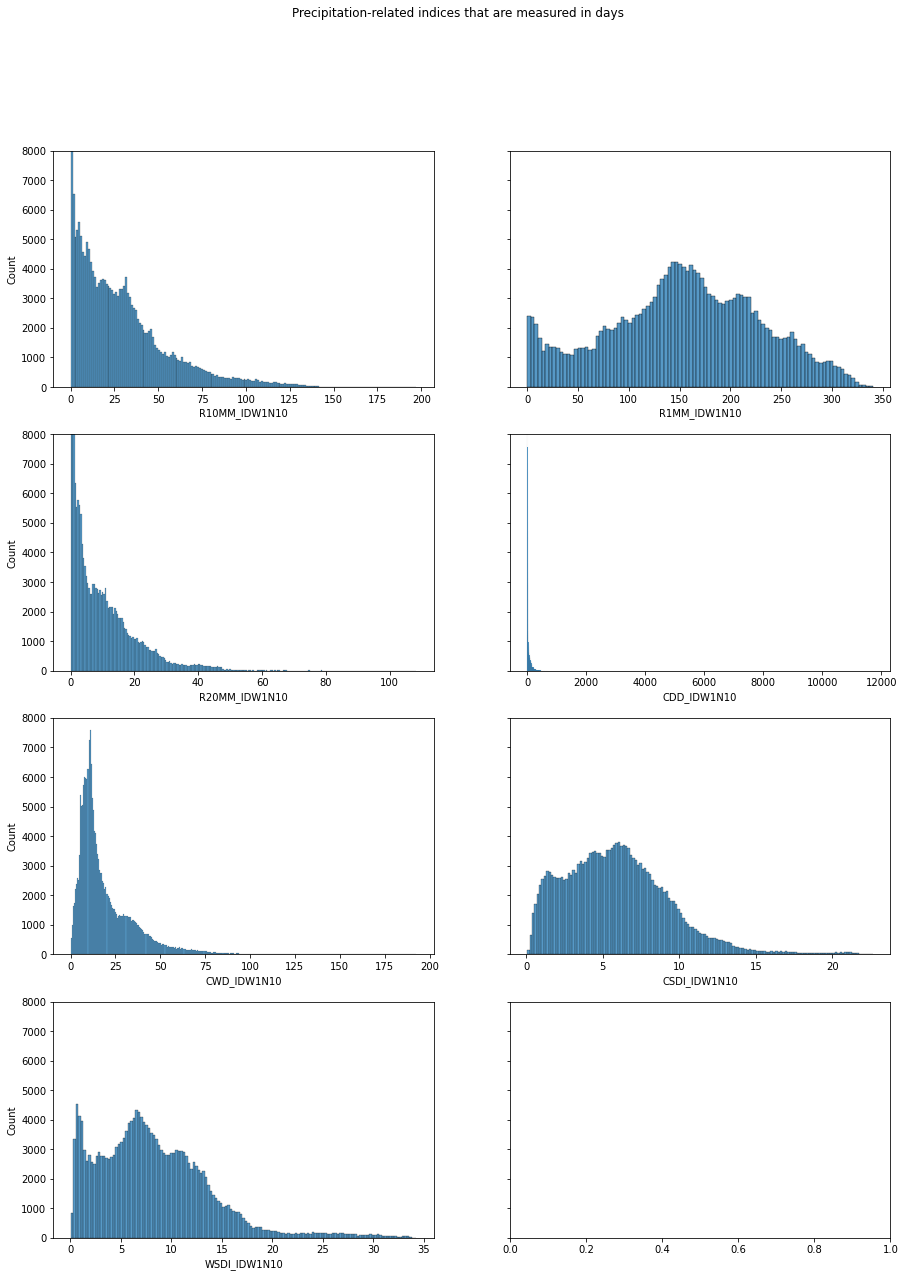

In [51]:
# definitely something off about CDD, will export to CSV to visualize in QGIS
fig, axes = plt.subplots(4, 2, figsize=(15, 18),sharey=True)
plt.ylim((0,8000))
fig.suptitle('Precipitation-related indices that are measured in days')

for idx,ax in zip(precp_days_group, axes.flat):
    sns.histplot(ax=ax,data=present[idx])

In [70]:
# 1903 hexagons with max length of dry spell > 365
present[present["CDD_IDW1N10"]>365].HID.nunique()

1903

In [79]:
# saving CDD_outliers to file for visualization in QGIS
CDD_outliers = present[present["CDD_IDW1N10"]>365]
CDD_outliers.drop(CDD_outliers.columns.difference(['HID',"CDD_IDW1N10"]), 1,inplace=True)
CDD_outliers["value_over365"] = 1

CDD_outliers.to_csv("cdd_outliers.csv", index=False)

/Users/t-r-espr/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-79-017546a7800b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDD_outliers["value_over365"] = 1


In [80]:
CDD_outliers

,HID,CDD_IDW1N10,value_over365
33778,33779,385.091032,1
33859,33860,368.278155,1
33940,33941,461.794300,1
34021,34022,533.456267,1
34102,34103,487.049991,1
...,...,...,...
151408,151409,381.068374,1
151486,151487,372.964939,1
151487,151488,402.618860,1
151488,151489,387.379018,1


In [68]:
present[(present["HID"].between(148883,148903))]

,HID,CDD_IDW1N10,CSDI_IDW1N10,CWD_IDW1N10,DTR_IDW1N10,FD_IDW1N10,GSL_IDW1N10,ID_IDW1N10,PRCPTOT_IDW1N10,R10MM_IDW1N10,R1MM_IDW1N10,R20MM_IDW1N10,R95P_IDW1N10,R99P_IDW1N10,RX1DAY_IDW1N10,RX5DAY_IDW1N10,SDII_IDW1N10,SU_IDW1N10,TN10P_IDW1N10,TN90P_IDW1N10,TNN_IDW1N10,TNX_IDW1N10,TR_IDW1N10,TX10P_IDW1N10,TX90P_IDW1N10,TXN_IDW1N10,TXX_IDW1N10,WSDI_IDW1N10
148882,148883,183.399648,6.319002,2.136595,3.952926,365.0,0.0,365.0,10.958450,0.000000,7.166299,0.000000,1.125723,0.296773,2.322559,5.259575,1.487919,0.0,10.104687,11.193305,-62.740235,-20.598485,0.0,10.143633,10.708554,-60.129937,-18.058145,5.751381
148883,148884,224.525186,6.290200,1.781633,4.000855,365.0,0.0,365.0,6.813027,0.000000,4.540505,0.000000,0.602527,0.141977,2.078596,4.422925,1.445845,0.0,9.897975,11.267903,-66.304551,-21.575859,0.0,9.780131,11.025903,-63.679827,-18.817890,5.853101
148884,148885,301.647918,8.052176,1.423786,3.996624,365.0,0.0,365.0,4.801834,0.000000,3.217736,0.000000,0.419920,0.082399,1.848607,3.951425,1.282083,0.0,10.018428,11.460315,-67.494449,-22.342423,0.0,9.860991,11.141558,-64.963772,-19.219263,6.611955
148885,148886,412.367111,7.896560,1.053695,3.823704,365.0,0.0,365.0,2.610909,0.000000,1.921255,0.000000,0.183589,0.021967,1.382925,3.228011,0.988768,0.0,10.012259,11.061277,-68.311531,-23.904454,0.0,10.089656,11.037629,-66.048249,-20.581275,7.177305
148886,148887,532.015353,8.918838,0.860157,3.546225,365.0,0.0,365.0,1.677819,0.000000,1.285226,0.000000,0.091127,0.000000,1.200213,2.976897,0.813108,0.0,10.341018,10.903157,-68.179619,-25.594597,0.0,10.317451,10.984804,-66.217665,-22.249721,8.132041
148887,148888,670.232061,10.930915,0.633848,3.578882,365.0,0.0,365.0,0.996582,0.000000,0.827941,0.000000,0.042672,0.000000,1.061336,2.698771,0.662128,0.0,10.670016,10.966253,-67.802093,-27.272337,0.0,10.467646,11.021760,-66.149332,-23.270518,8.489339
148888,148889,800.712246,10.422951,0.508674,3.759915,365.0,0.0,365.0,0.730434,0.000000,0.615575,0.000000,0.029174,0.000000,1.009091,2.524502,0.553213,0.0,10.725049,10.934497,-68.491944,-28.154854,0.0,10.485925,10.957874,-66.956693,-23.842699,9.103577
148889,148890,962.462283,11.173858,0.431310,3.869419,365.0,0.0,365.0,0.567074,0.000000,0.484980,0.000000,0.013253,0.000000,0.953994,2.433555,0.465102,0.0,10.742697,10.900944,-69.142445,-28.867086,0.0,10.608713,10.914205,-67.673644,-24.341723,9.720629
148890,148891,1228.372873,12.100477,0.345653,3.919434,365.0,0.0,365.0,0.446636,0.000000,0.386152,0.000000,0.000000,0.000000,0.906271,2.376572,0.365895,0.0,10.636827,10.907654,-69.971802,-29.556005,0.0,10.509364,10.984218,-68.501322,-24.706822,10.141329
148891,148892,4432.955422,11.598184,0.145236,4.027393,365.0,0.0,365.0,0.192966,0.000000,0.161476,0.000000,0.000000,0.000000,0.793077,2.106337,0.165660,0.0,10.333356,10.946937,-71.436702,-29.736725,0.0,10.131251,11.073609,-69.965169,-24.593692,10.578176
